In [13]:
import requests
import pandas as pd

url = "https://sofascores.p.rapidapi.com/v1/teams/player-statistics/result"

querystring = {"team_id": "5981", "unique_tournament_id": "92", "season_id": "56974"}

headers = {
    "X-RapidAPI-Key": "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1",
    "X-RapidAPI-Host": "sofascores.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

# Verifica se a requisição foi bem-sucedida (código 200)
if response.status_code == 200:
    # Transforma o JSON em um DataFrame
    json_data = response.json()
    dataframe = pd.DataFrame(json_data)
    print(dataframe)
else:
    print(f"Erro na requisição. Código de status: {response.status_code}")


                                                                 data
accurateLongBalls   [{'statistics': {'accurateLongBalls': 3, 'id':...
accuratePasses      [{'statistics': {'accuratePasses': 54, 'accura...
assists             [{'statistics': {'id': 1263383, 'assists': 1, ...
clearances          [{'statistics': {'clearances': 3, 'id': 126339...
goals               [{'statistics': {'goals': 1, 'id': 1263384, 't...
goalsAssistsSum     [{'statistics': {'goalsAssistsSum': 1, 'id': 1...
interceptions       [{'statistics': {'interceptions': 6, 'id': 126...
keyPasses           [{'statistics': {'keyPasses': 8, 'id': 1263384...
rating              [{'statistics': {'rating': 9.6, 'id': 1263384,...
scoringFrequency    [{'statistics': {'scoringFrequency': 21, 'id':...
shotsOnTarget       [{'statistics': {'shotsOnTarget': 3, 'id': 126...
successfulDribbles  [{'statistics': {'successfulDribbles': 6, 'suc...
totalShots          [{'statistics': {'totalShots': 7, 'id': 126339...


In [14]:
dataframe.columns

Index(['data'], dtype='object')

TypeError: unhashable type: 'list'

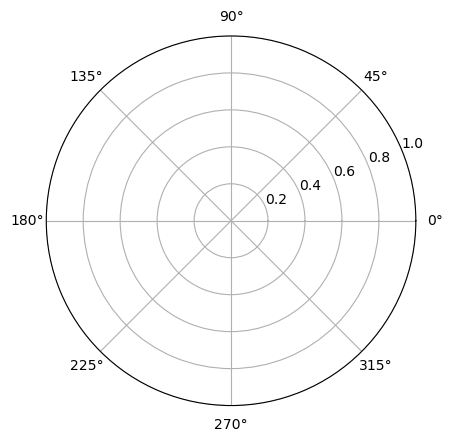

In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://sofascores.p.rapidapi.com/v1/teams/player-statistics/result"

querystring = {"team_id": "5981", "unique_tournament_id": "92", "season_id": "56974"}

headers = {
    "X-RapidAPI-Key": "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1",
    "X-RapidAPI-Host": "sofascores.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

# Verifica se a requisição foi bem-sucedida (código 200)
if response.status_code == 200:
    # Transforma o JSON em um DataFrame
    json_data = response.json()
    dataframe = pd.DataFrame(json_data)

    # Crie um gráfico de radar
    labels = dataframe.columns  # Supondo que as colunas do DataFrame são os rótulos
    values = dataframe.iloc[0].values  # Supondo que você queira usar os dados da primeira linha

    num_vars = len(labels)
    angles = [n / float(num_vars) * 2 * 3.14159265358979323846 for n in range(num_vars)]
    values += values[:1]
    angles += angles[:1]

    plt.polar(angles, values, marker='o', linestyle='-', color='b')
    plt.fill(angles, values, color='b', alpha=0.25)
    plt.title('Gráfico de Radar')
    plt.show()

else:
    print(f"Erro na requisição. Código de status: {response.status_code}")


In [16]:
import requests

class SofaScoresAPIWrapper:
    def __init__(self, api_key):
        self.base_url = "https://sofascores.p.rapidapi.com/v1"
        self.headers = {
            "X-RapidAPI-Key": api_key,
            "X-RapidAPI-Host": "sofascores.p.rapidapi.com"
        }

    def obter_estatisticas_jogador(self, team_id, unique_tournament_id, season_id):
        endpoint = "/teams/player-statistics/result"
        params = {
            "team_id": team_id,
            "unique_tournament_id": unique_tournament_id,
            "season_id": season_id
        }
        url = f"{self.base_url}{endpoint}"

        response = requests.get(url, headers=self.headers, params=params)

        if response.status_code == 200:
            return response.json()
        else:
            # Lidar com erros de requisição, por exemplo:
            print(f"Erro ao obter estatísticas do jogador. Código de status: {response.status_code}")
            return None

# Exemplo de uso
api_key = "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1"
sofascores_api = SofaScoresAPIWrapper(api_key)

# Obter estatísticas de jogador para um time, torneio e temporada específicos
team_id = "5981"
unique_tournament_id = "92"
season_id = "56974"

estatisticas_jogador = sofascores_api.obter_estatisticas_jogador(team_id, unique_tournament_id, season_id)
print(estatisticas_jogador)


{'data': {'rating': [{'statistics': {'rating': 9.6, 'id': 1263384, 'type': 'overall', 'appearances': 1}, 'playedEnough': True, 'player': {'name': 'Everton', 'slug': 'everton', 'shortName': 'Everton', 'position': 'F', 'userCount': 6266, 'id': 386198, 'fieldTranslations': {'nameTranslation': {'ar': 'إيفرتون'}, 'shortNameTranslation': {}}}}, {'statistics': {'rating': 7.8, 'id': 1263386, 'type': 'overall', 'appearances': 1}, 'playedEnough': True, 'player': {'name': 'Léo Pereira', 'slug': 'leo-pereira', 'shortName': 'Léo Pereira', 'position': 'D', 'userCount': 1696, 'id': 358548}}, {'statistics': {'rating': 7.8, 'id': 1263383, 'type': 'overall', 'appearances': 1}, 'playedEnough': True, 'player': {'name': 'Giorgian De Arrascaeta', 'slug': 'giorgian-de-arrascaeta', 'shortName': 'G. De Arrascaeta', 'position': 'M', 'userCount': 15981, 'id': 333587, 'fieldTranslations': {'nameTranslation': {'ar': 'أراسكايتا'}, 'shortNameTranslation': {}}}}, {'statistics': {'rating': 7.8, 'id': 1263393, 'type': 

In [17]:


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.patches import RegularPolygon

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import os



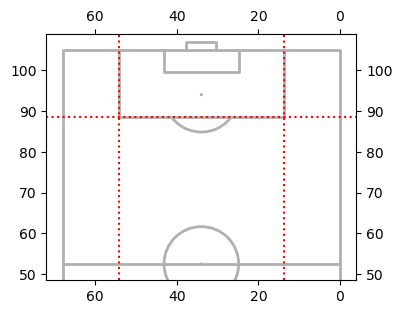

In [18]:


fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

ax.plot([13.84, 13.84], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
ax.plot([54.16, 54.16], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [88.5,88.5], ls=':', color='red')



In [19]:
def is_inside_box(x,y):
    '''
    Checks if a shot lies within the dimensions of our box.
    '''
    if (x >= 13.84) & (x <= 54.16) & (y >=88.5):
        return True
    else:
        return False

KeyError: 'y'